In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob as gb
from tqdm import tqdm
import tensorflow as tf

In [2]:
#defining train data set
train_dir='../large_files/Test_Dataset_Faces/'
Train_Data=tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rescale=1/255.0,
).flow_from_directory(train_dir,batch_size=16,subset="training",target_size=(224,224),shuffle=False)


Found 1692 images belonging to 22 classes.


In [3]:
list(Train_Data.class_indices.keys())


['Abdullah_Gul',
 'Alejandro_Toledo',
 'Alvaro_Uribe',
 'Amelie_Mauresmo',
 'Bill_Simon',
 'Catherine_Zeta-Jones',
 'David_Beckham',
 'Dick_Cheney',
 'John_Kerry',
 'Keanu_Reeves',
 'Kim_Ryong-sung',
 'Kofi_Annan',
 'Lance_Armstrong',
 'Mahmoud_Abbas',
 'Megawati_Sukarnoputri',
 'Meryl_Streep',
 'Mo_Rawhani',
 'Nicole_Kidman',
 'Paul_Bremer',
 'Paul_Burrell',
 'Pervez_Musharraf',
 'Wissam_Ramadan']

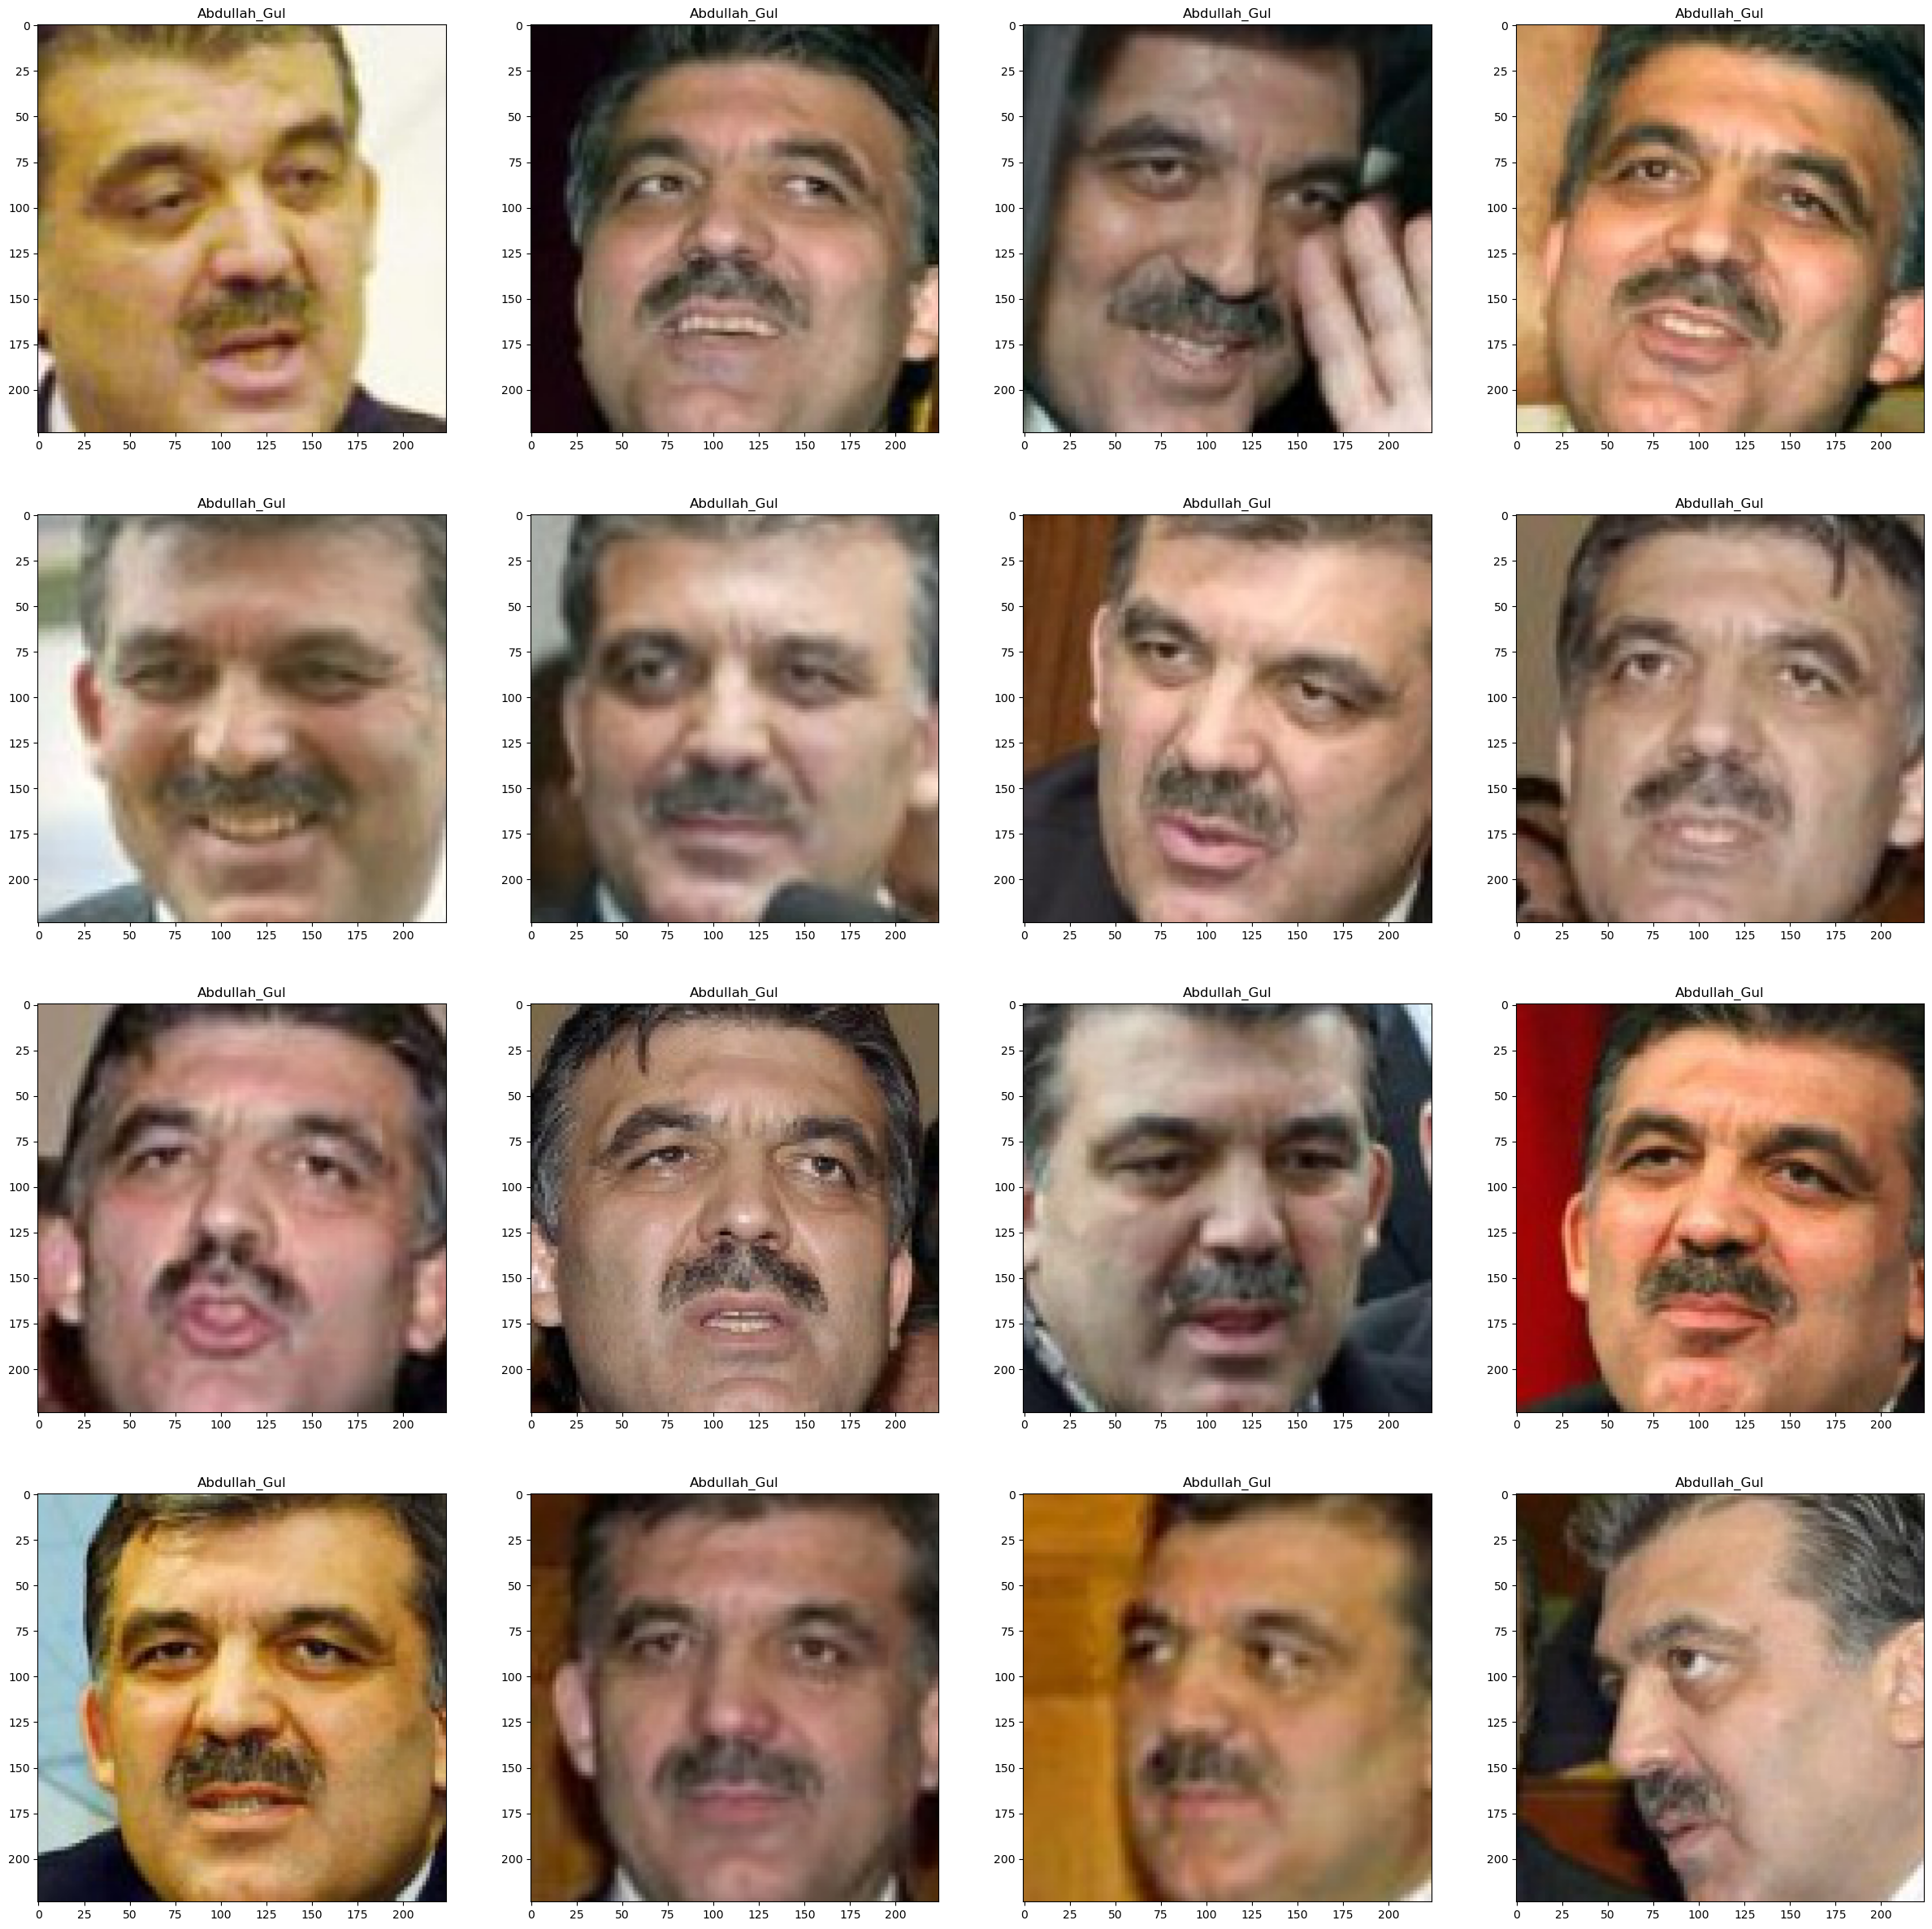

In [4]:
classes=list(Train_Data.class_indices.keys())
plt.figure(figsize=(30,30))
for X_batch, y_batch in Train_Data:
    # create a grid of 7x7 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [6]:
model = vgg_face()

model.load_weights('../large_files/vgg_face_weights.h5')

In [7]:
from tensorflow.keras.models import Model
model = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_input (Input  [(None, 224, 224, 3)]    0         
 Layer)                                                          
                                                                 
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                             

In [8]:
embedding_vector = model.predict(Train_Data,steps=len(Train_Data), verbose=1)

106/106 [==============================] - 204s 2s/step


## Saving Model and embedding_vector

In [9]:

pickle.dump(embedding_vector, open('saved_files/auth_embedding_vector.pkl','wb'))

pickle.dump(model, open('saved_files/auth_model.pkl','wb'))

del embedding_vector 

del model


NameError: name 'pickle' is not defined

In [ ]:
model = pickle.load(open('saved_files/auth_model.pkl','rb'))
embedding_vector = pickle.load(open('saved_files/auth_embedding_vector.pkl','rb'))


In [ ]:
y_train=Train_Data.labels

np.save('Xdata',embedding_vector)

np.save('ydata',y_train)

embedding_vector = np.load('Xdata.npy')
y_train = np.load('ydata.npy')

embedding_vector[0]


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(embedding_vector,y_train,test_size=0.1,shuffle=True, stratify=y_train,random_state=42)

from sklearn.utils import shuffle

X_train,y_train = shuffle(X_train,y_train)



#### Preprocessing and feature extraction

In [ ]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

from sklearn.decomposition import PCA

pca = PCA(n_components=128)

In [ ]:

# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape

# Train

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear',C=2.,class_weight='balanced',decision_function_shape='ovo',probability=True)
clf.fit(X_train, y_train)

In [ ]:
y_predict = clf.predict(X_test)

y_predict[:5]



In [ ]:
# Find the classification accuracy
from sklearn.metrics import accuracy_score
print(f'The Accuracy of VGGFace2 is {accuracy_score(y_test,y_predict)*100} %')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

In [3]:
### Keep Models 
import pickle 


In [26]:
'''
pickle.dump(clf, open('saved_files/auth_clf.pkl','wb'))

pickle.dump(model, open('saved_files/auth_model.pkl','wb'))

del clf 

clf = pickle.load(open('saved_files/auth_clf.pkl','rb'))
model = pickle.load(open('saved_files/auth_model.pkl','rb'))
del model
'''



In [28]:
clf

SVC(C=2.0, class_weight='balanced', decision_function_shape='ovo',
    kernel='linear', probability=True)

# Test Identification

In [5]:
from numpy import expand_dims
from cv2 import resize,INTER_CUBIC
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
import cv2


def preprocess_image(img):
        img = img_to_array(img)
        img = img/255.0
        img = expand_dims(img, axis=0)
        return img

def Face_Recognition(roi, model, scaler, pca, clf):
        roi = resize(roi, dsize=(224,224), interpolation=INTER_CUBIC)
        roi = preprocess_image(roi)
        embedding_vector = model.predict(roi)[0]

        embedding_vector = scaler.transform(embedding_vector.reshape(1, -1))
        embedding_vector_pca = pca.transform(embedding_vector)
        result1 = clf.predict(embedding_vector_pca)[0]

        y_predict = clf.predict_proba(embedding_vector_pca)[0]
        result = np.where(y_predict > 0.4)[0]

        return result, y_predict

try:
    other = 0
    mtcnn = MTCNN(image_size=160, margin=14, min_face_size=20, device='cpu', post_process=False)
    cap = cv2.VideoCapture(0)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)

    classes = {
        0: 'Abdullah_Gul',
        1: 'Alejandro_Toledo',
        2: 'Alvaro_Uribe',
        3: 'Amelie_Mauresmo',
        4: 'Bill_Simon',
        5: 'Catherine_Zeta-Jones',
        6: 'David_Beckham',
        7: 'Dick_Cheney',
        8: 'John_Kerry',
        9: 'Keanu_Reeves',
        10: 'Kim_Ryong-sung',
        11: 'Kofi_Annan',
        12: 'Lance_Armstrong',
        13: 'Mahmoud_Abbas',
        14: 'Megawati_Sukarnoputri',
        15: 'Meryl_Streep',
         16:    'Mo_Rawhani',
          17:   'Nicole_Kidman',
          18:   'Paul_Bremer',
         19:    'Paul_Burrell',
         20:    'Pervez_Musharraf',
          21:   'Wissam_Ramadan'
    }

    def ImageClass(n):
        return classes.get(n, 'Other')

    size = (640, 480)
    result_video = cv2.VideoWriter('Face.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10, size)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    color = (255, 0, 0)
    thickness = 2

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_face = frame.copy()
        boxes, _ = mtcnn.detect(frame_face, landmarks=False)

        if boxes is not None:
            for box in boxes:
                x1, y1, x2, y2 = box.astype(int)
                roi = frame[y1:y2, x1:x2]
                # Check if ROI is empty
                if roi.size == 0 or roi.shape[0] == 0 or roi.shape[1] == 0:
                    continue
                result, y_predict = Face_Recognition(roi, model, scaler, pca, clf)

                if len(result) > 1:
                    cv2.putText(frame, ImageClass(result[0]), (x1-5, y1-5), font, fontScale, color, thickness, cv2.LINE_AA)
                    cv2.putText(frame, str(np.round(y_predict[result[0]], 2)), (x2, y2-10), font, fontScale, color, thickness, cv2.LINE_AA)
                elif len(result) == 0:
                    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2BGR)
                    cv2.imwrite(f'Pic{other}.png', roi)
                    cv2.putText(frame, 'Other', (x1-5, y1-5), font, fontScale, color, thickness, cv2.LINE_AA)
                else:
                    cv2.putText(frame, ImageClass(result[0]), (x1-5, y1-5), font, fontScale, color, thickness, cv2.LINE_AA)
                    cv2.putText(frame, str(np.round(y_predict[result[0]], 2)), (x2, y2-10), font, fontScale, color, thickness, cv2.LINE_AA)

                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

        #result_video.write(frame)
        cv2.imshow('frame', frame)

        if cv2.waitKey(1) == ord('q'):
            break
finally:

    cap.release()
    result_video.release()
    cv2.destroyAllWindows()

NameError: name 'scaler' is not defined

In [33]:
from numpy import expand_dims
from cv2 import resize,INTER_CUBIC
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
import cv2


# Import time module
import time

# Counter for 'Mo_Rawhani'
rawhani_count = 0

# The start time of detection for 'Mo_Rawhani'
rawhani_start_time = 0

person= "Mo_Rawhani"
def preprocess_image(img):
        img = img_to_array(img)
        img = img/255.0
        img = expand_dims(img, axis=0)
        return img

def Face_Recognition(roi, model, scaler, pca, clf):
        roi = resize(roi, dsize=(224,224), interpolation=INTER_CUBIC)
        roi = preprocess_image(roi)
        embedding_vector = model.predict(roi,verbose=0)[0]

        embedding_vector = scaler.transform(embedding_vector.reshape(1, -1))
        embedding_vector_pca = pca.transform(embedding_vector)
        result1 = clf.predict(embedding_vector_pca)[0]

        y_predict = clf.predict_proba(embedding_vector_pca)[0]
        result = np.where(y_predict > 0.4)[0]

        return result, y_predict
is_Allowed = False
try:
    other = 0
    mtcnn = MTCNN(image_size=160, margin=14, min_face_size=20, device='cpu', post_process=False)
    cap = cv2.VideoCapture(0)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)

    classes = {
        0: 'Abdullah_Gul',
        1: 'Alejandro_Toledo',
        2: 'Alvaro_Uribe',
        3: 'Amelie_Mauresmo',
        4: 'Bill_Simon',
        5: 'Catherine_Zeta-Jones',
        6: 'David_Beckham',
        7: 'Dick_Cheney',
        8: 'John_Kerry',
        9: 'Keanu_Reeves',
        10: 'Kim_Ryong-sung',
        11: 'Kofi_Annan',
        12: 'Lance_Armstrong',
        13: 'Mahmoud_Abbas',
        14: 'Megawati_Sukarnoputri',
        15: 'Meryl_Streep',
         16:    'Mo_Rawhani',
          17:   'Nicole_Kidman',
          18:   'Paul_Bremer',
         19:    'Paul_Burrell',
         20:    'Pervez_Musharraf',
          21:   'Wissam_Ramadan'
    }

    def ImageClass(n):
        return classes.get(n, 'Other')

    size = (640, 480)
    result_video = cv2.VideoWriter('Face.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10, size)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    color = (255, 0, 0)
    thickness = 2



    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_face = frame.copy()
        boxes, _ = mtcnn.detect(frame_face, landmarks=False)

        if boxes is not None:
            for box in boxes:
                x1, y1, x2, y2 = box.astype(int)
                roi = frame[y1:y2, x1:x2]

                if roi.size == 0 or roi.shape[0] == 0 or roi.shape[1] == 0:
                    continue

                result, y_predict = Face_Recognition(roi, model, scaler, pca, clf)

                if len(result) > 1:
                    if ImageClass(result[0]) == 'Mo_Rawhani':
                        if rawhani_start_time == 0:
                            rawhani_start_time = time.time()
                        rawhani_count += 1
                        print(f"Rawhani count: {rawhani_count}, Time elapsed: {time.time() - rawhani_start_time}")
                    cv2.putText(frame, ImageClass(result[0]), (x1-5, y1-5), font, fontScale, color, thickness, cv2.LINE_AA)
                    cv2.putText(frame, str(np.round(y_predict[result[0]], 2)), (x2, y2-10), font, fontScale, color, thickness, cv2.LINE_AA)
                elif len(result) == 0:
                    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2BGR)
                    cv2.imwrite(f'Pic{other}.png', roi)
                    cv2.putText(frame, 'Other', (x1-5, y1-5), font, fontScale, color, thickness, cv2.LINE_AA)
                else:
                    if ImageClass(result[0]) == 'Mo_Rawhani':
                        if rawhani_start_time == 0:
                            rawhani_start_time = time.time()
                        rawhani_count += 1
                        print(f"Rawhani count: {rawhani_count}, Time elapsed: {time.time() - rawhani_start_time}")
                    cv2.putText(frame, ImageClass(result[0]), (x1-5, y1-5), font, fontScale, color, thickness, cv2.LINE_AA)
                    cv2.putText(frame, str(np.round(y_predict[result[0]], 2)), (x2, y2-10), font, fontScale, color, thickness, cv2.LINE_AA)

                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

            if rawhani_count > 30 and (time.time() - rawhani_start_time) > 3:
                print("Calling isAuthenticated")
               
                is_Allowed = True
                
                break
                # Reset the counter and timer
                #rawhani_count = 0
                #rawhani_start_time = 0

        #result_video.write(frame)
        cv2.imshow('frame', frame)

        if cv2.waitKey(1) == ord('q'):
            break

finally:

    cap.release()
    result_video.release()
    cv2.destroyAllWindows()
    if(is_Allowed):
        isAuthenticated()

Rawhani count: 1, Time elapsed: 0.0
Rawhani count: 2, Time elapsed: 21.28168296813965
Rawhani count: 3, Time elapsed: 22.594298601150513
Rawhani count: 4, Time elapsed: 22.929247856140137
Rawhani count: 5, Time elapsed: 23.086241483688354
Rawhani count: 6, Time elapsed: 23.247097492218018
Rawhani count: 7, Time elapsed: 23.403984546661377
Rawhani count: 8, Time elapsed: 23.561366319656372
Rawhani count: 9, Time elapsed: 23.715359210968018
Rawhani count: 10, Time elapsed: 23.876468896865845
Rawhani count: 11, Time elapsed: 24.19570827484131
Rawhani count: 12, Time elapsed: 24.365633964538574
Rawhani count: 13, Time elapsed: 24.52342462539673
Rawhani count: 14, Time elapsed: 24.680330276489258
Rawhani count: 15, Time elapsed: 24.844639778137207
Rawhani count: 16, Time elapsed: 25.01495385169983
Rawhani count: 17, Time elapsed: 25.173229694366455
Rawhani count: 18, Time elapsed: 25.34449338912964
Rawhani count: 19, Time elapsed: 25.51736092567444
Rawhani count: 20, Time elapsed: 25.673371

In [31]:

import time
import dlib
import cv2
import numpy as np
from scipy.spatial import distance as dist
def isAuthenticated():
    print('Authinticated')
    time.sleep(5)
    '''
    Please note that the shape_predictor_68_face_landmarks.dat file, which contains the pretrained model 
    for detecting the facial landmarks, is not included in the dlib library
    , and you will have to download it separately. 
    You can find it here: http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

    Unzip it and provide the correct path in the script.
    '''


    def get_ear(eye):
        A = dist.euclidean(eye[1], eye[5])
        B = dist.euclidean(eye[2], eye[4])
        C = dist.euclidean(eye[0], eye[3])
        ear = (A + B) / (2.0 * C)
        return ear

    # Indices of left and right eyes in dlib's facial landmarks
    LEFT_EYE_INDICES = list(range(36, 42))
    RIGHT_EYE_INDICES = list(range(42, 48))

    EAR_THRESHOLD = 0.28  # Eye Aspect Ratio threshold for blink detection
    PAUSE_TIME_THRESHOLD = 2.0  # Pause time threshold (in seconds)

    cap = cv2.VideoCapture(0)
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("../large_files/shape_predictor_68_face_landmarks.dat")

    blink_count = 0
    blink_count_sequence = []
    prev_blink_detected = False
    blink_start_time = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 0)

        for rect in rects:
            shape = predictor(gray, rect)
            shape = np.array([[p.x, p.y] for p in shape.parts()])
            left_eye = shape[LEFT_EYE_INDICES]
            right_eye = shape[RIGHT_EYE_INDICES]
            left_ear = get_ear(left_eye)
            right_ear = get_ear(right_eye)
            avg_ear = (left_ear + right_ear) / 2.0

            cv2.putText(frame, f"EAR: {avg_ear:.2f}", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            cv2.putText(frame, f"Blinks: {blink_count}", (10, 60),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

            blink_detected = avg_ear < EAR_THRESHOLD

            if blink_detected and not prev_blink_detected:  # Blink start
                blink_start_time = time.time()

            if not blink_detected and prev_blink_detected:  # Blink end
                blink_end_time = time.time()
                blink_duration = blink_end_time - blink_start_time

                if blink_duration >= PAUSE_TIME_THRESHOLD:
                    blink_count_sequence.append(blink_count)
                    blink_count = 0
                else:
                    blink_count += 1

            prev_blink_detected = blink_detected

        cv2.imshow("Frame", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Append remaining blink count to sequence
    if blink_count > 0:
        blink_count_sequence.append(blink_count)
    AUTHENTICATION_PATTERN = [3, 2]  # Pattern of consecutive blinks for authentication
    # Check if blink sequence matches authentication pattern
    if blink_count_sequence == AUTHENTICATION_PATTERN:
        print("Authenticated!")
    print("Blink sequence:", blink_count_sequence)
    cap.release()
    cv2.destroyAllWindows()


In [32]:
isAuthenticated()

Authinticated
Authenticated!
Blink sequence: [3, 2]
